## Data processing

In [82]:
# load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import timeit
plt.style.use('fivethirtyeight')
%matplotlib inline

starcraft3=pd.read_csv('starcraft3_nomissing.csv')
starcraft3.isnull().sum()
#starcraft3.dtypes

Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
LeagueIndex             0
dtype: int64

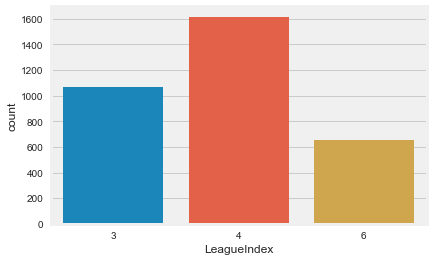

In [83]:
f = plt.figure()
sns.countplot(x='LeagueIndex',data=starcraft3)
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s01.pdf", bbox_inches='tight')



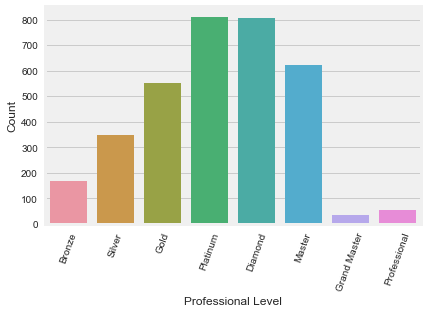

In [84]:
f = plt.figure()
starcraft7=pd.read_csv('SkillCraft1_Dataset.csv')
sns.countplot(x='LeagueIndex',data=starcraft7)
#plt.title("Fig 1. StarCraft (8 Classes) Sample Distribution")
plt.xlabel('Professional Level')
plt.ylabel('Count')
plt.xticks(np.arange(8), ('Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond','Master', 'Grand Master', 'Professional'),
          rotation = 70)
plt.show()

f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s02.pdf", bbox_inches='tight')



In [85]:
starcraft3.shape

(3338, 19)

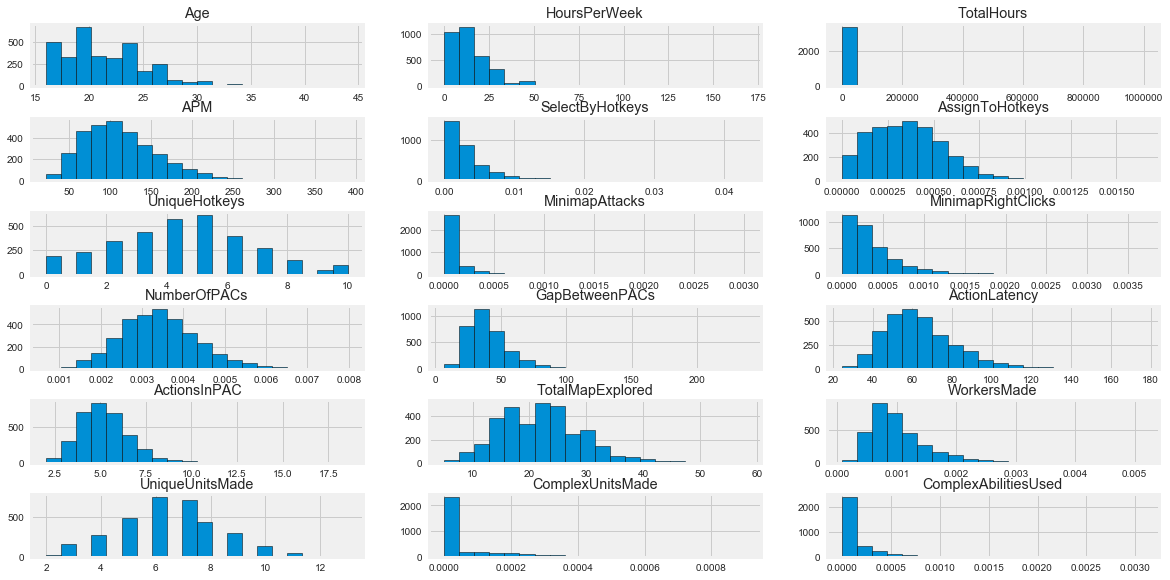

In [86]:
columns=starcraft3.columns[:18]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    starcraft3[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### import libraries

In [87]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.learning_curve import validation_curve
from sklearn.learning_curve import learning_curve
from time import time
import warnings
warnings.filterwarnings('ignore')

# set the following figure sizes
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': (4,3)})

### Stratification
When we split the dataset into train and test datasets, the split is completely random. Thus the instances of each class label or outcome in the train or test datasets is random. Thus we may have many instances of class 1 in training data and less instances of class 2 in the training data. So during classification, we may have accurate predictions for class1 but not for class2. Thus we stratify the data, so that we have proportionate data for all the classes in both the training and testing data.

In [88]:
outcome=starcraft3['LeagueIndex']
data=starcraft3[starcraft3.columns[:18]]
train,test=train_test_split(starcraft3,test_size=0.2,random_state=0,stratify=starcraft3['LeagueIndex'])# stratify the outcome
train_X=train[train.columns[:18]]
test_X=test[test.columns[:18]]
train_Y=train['LeagueIndex']
test_Y=test['LeagueIndex']

In [89]:
train_X.head(5)

Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
2349   16            28         450  175.1322         0.008141   
1407   22             6         312   51.9126         0.000138   
2093   24            10         600  128.7060         0.006849   
729    27            14         300  106.6950         0.003000   
1113   20            12         900  163.0764         0.005474   

      AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
2349         0.000200              5        0.000190            0.000441   
1407         0.000063              3        0.000063            0.000063   
2093         0.000466              6        0.000000            0.000341   
729          0.000190              4        0.000000            0.000095   
1113         0.000731              4        0.000022            0.000244   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
2349      0.003695         23.9348        43.7724        6.7209   
1407      0.002626         59.5407        92.1524        3.6524   
2093      0.002474         39.5912        65.5362        7.2464   
729       0.003410         69.0196        64.6257        5.0670   
1113      0.003989         34.3687        41.3778        5.5222   

      TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
2349                22     0.000391                9               0.0   
1407                18     0.000425                5               0.0   
2093                16     0.000950                6               0.0   
729                 23     0.000695                8               0.0   
1113                19     0.001175                5               0.0   

      ComplexAbilitiesUsed  
2349              0.000000  
1407              0.000000  
2093              0.000108  
729               0.000000  
1113              0.000000

In [90]:
train_Y.head(2)

2349    4
1407    4
Name: LeagueIndex, dtype: int64

In [91]:
train_X.shape

(2670, 18)

In [92]:
test_X.shape

(668, 18)

In [93]:
train_X.columns

Index(['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys',
       'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')

### Scale data

In [94]:
from sklearn.preprocessing import StandardScaler

# fit a standardScaler to normalize all input to zero mean and unit variance
scaler = StandardScaler().fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), columns = train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X), columns = test_X.columns)

In [95]:
type(train_X)

pandas.core.frame.DataFrame

In [96]:
train_X.head(2)

Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
0 -1.340756      0.997052   -0.029085  1.270467         0.877740   
1  0.088503     -0.831219   -0.036218 -1.304113        -0.819382   

   AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0        -0.776935       0.297735        0.571543            0.173118   
1        -1.424606      -0.562137       -0.197495           -0.881338   

   NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      0.274487       -0.979390      -1.067428      0.983337   
1     -0.846689        1.108522       1.467267     -1.072151   

   TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0         -0.014580    -1.213327         1.323668         -0.537622   
1         -0.546046    -1.148113        -0.820867         -0.537622   

   ComplexAbilitiesUsed  
0             -0.532777  
1             -0.532777

In [97]:
test_X.head(5)

Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
0  0.088503      0.664639   -0.000654 -0.528439        -0.443398   
1 -1.102546     -0.332600   -0.036838  0.771889        -0.140151   
2 -0.626126     -0.498806   -0.049761 -1.101497        -0.380628   
3 -1.340756     -0.000187   -0.042008 -1.107816        -0.621953   
4 -0.387916      3.323943   -0.010993 -0.168465        -0.493445   

   AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0        -0.020530      -0.132201       -0.439712            0.446496   
1         0.140206       0.727670       -0.578987           -0.022151   
2        -0.531103       1.157606       -0.233828           -0.468482   
3        -0.138718      -0.132201        0.432269           -0.624698   
4         0.239484      -0.562137       -0.476045           -0.733491   

   NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0     -1.172868        0.926195       0.311760      0.981662   
1      0.353147       -0.372518      -0.738897      1.098152   
2     -0.843543        2.673517       1.070549     -1.101893   
3     -0.575048        0.744178       0.821229     -1.045624   
4     -0.018131       -0.969843      -0.259966      0.012632   

   TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0         -1.210379     2.003251        -0.820867         -0.537622   
1         -0.147447     0.150410        -0.284733          4.924495   
2          1.048351    -1.029194         0.787534         -0.537622   
3         -0.413180     0.037245        -0.284733         -0.537622   
4         -1.343245    -1.008095        -0.820867         -0.537622   

   ComplexAbilitiesUsed  
0             -0.532777  
1              5.674054  
2             -0.532777  
3             -0.238488  
4             -0.089432

## Decision Tree

### A simple run

In [98]:
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2,criterion='entropy', min_samples_leaf=1)
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
#print "Train acc:", train_acc
#print "Test acc:", test_acc

### pruning by max depth, validation curve

In [99]:
degree = range(1,31)
train_scores, val_scores = validation_curve(DecisionTreeClassifier(random_state=42), train_X, train_Y,
                                          'max_depth', degree, cv=10)

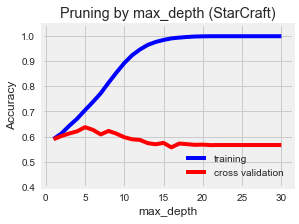

In [100]:
f = plt.figure()
plt.plot(degree, np.mean(train_scores, 1),color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='cross validation')
#plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc='lower right')
plt.ylim(0.4, 1.05)
plt.title("Pruning by max_depth (StarCraft)")
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,5))
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s03.pdf", bbox_inches='tight')



### change min split
The minimum number of samples required to split an internal node

In [25]:
degree = range(2,200)
train_scores, val_scores = validation_curve(DecisionTreeClassifier(random_state=42), train_X, train_Y,
                                          'min_samples_split', degree, cv=10)

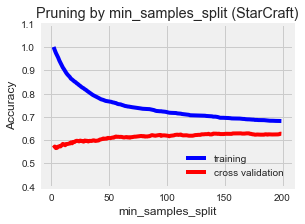

In [32]:
f = plt.figure()
plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='cross validation')
plt.legend(loc='lower right')
plt.ylim(0.4, 1.1)
plt.title("Pruning by min_samples_split (StarCraft)")
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s04.pdf", bbox_inches='tight')



### Grid search to find best parameter

In [27]:
# determine optimal pruning for the decision trees using cross-validation grid-search

# set of parameters to test
param_grid = {#"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10, 20, 40],
              "max_depth": [2, 5, 10, 15, 20],
              }

tree_gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid=param_grid, cv=3)

tree_gs.fit(train_X, train_Y)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 5, 10, 20, 40], 'max_depth': [2, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [28]:
tree_gs.best_params_

{'max_depth': 5, 'min_samples_split': 40}

### statistics for best model

In [29]:
tree_final_model = tree_gs.best_estimator_
start = timeit.default_timer()
clf = tree_final_model.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start
treeObj = clf.tree_

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
#print 'tree size: ', treeObj.node_count
#print 'train acc: ', train_acc
#print 'test acc: ', test_acc
#print 'train time: ', train_time
#print 'test time: ', test_time

### statistics for default parameter (no pruning)

In [30]:
clf = DecisionTreeClassifier()
start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start
treeObj = clf.tree_

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
#print 'tree size: ', treeObj.node_count
#print 'train acc: ', train_acc
#print 'test acc: ', test_acc
#print 'train time: ', train_time
#print 'test time: ', test_time

### learning curve on best parameter

In [31]:
training_size, train_lc, val_lc = learning_curve(DecisionTreeClassifier(max_depth=5, min_samples_split=40),
                                         train_X, train_Y, cv=10,
                                         train_sizes=np.linspace(0.001, 1, 50), n_jobs=1)

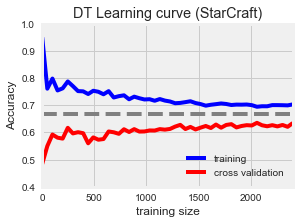

In [33]:
f = plt.figure()
plt.plot(training_size, np.mean(train_lc, 1), color='blue', label='training')
plt.plot(training_size, np.mean(val_lc, 1), color='red', label='cross validation')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), training_size[0], training_size[-1],
                 color='gray', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylim(0.4, 1.0)
plt.xlim(training_size[0], training_size[-1])
plt.title("DT Learning curve (StarCraft)")
plt.xlabel('training size')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s05.pdf", bbox_inches='tight')



## Boosting
hyperparameters:

1) n_estimators

2) learning_rate

In [34]:
from sklearn.ensemble import AdaBoostClassifier

### boosting - varying tree size and iteration

In [35]:
#degree = range(1,51,5)
degree = [1,2,5,10,20,50,100,200,500]
train_scoresb1, val_scoresb1 = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2)), train_X, train_Y,
                                          'n_estimators', degree, cv=10)
train_scoresb2, val_scoresb2 = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5)), train_X, train_Y,
                                          'n_estimators', degree, cv=10)
#train_scoresb3, val_scoresb3 = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=10)), train_X, train_Y,
#                                          'n_estimators', degree, cv=10)
train_scoresb4, val_scoresb4 = validation_curve(AdaBoostClassifier(DecisionTreeClassifier()), train_X, train_Y,
                                          'n_estimators', degree, cv=10)

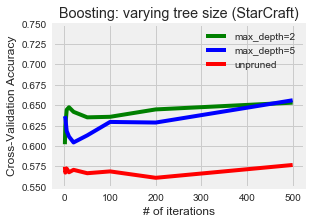

In [36]:
f = plt.figure()
plt.plot(degree, np.mean(val_scoresb1, 1), color='green', label='max_depth=2')
plt.plot(degree, np.mean(val_scoresb2, 1), color='blue', label='max_depth=5')
#plt.plot(degree, np.mean(val_scoresb3, 1), color='purple', label='max_depth=20')
plt.plot(degree, np.mean(val_scoresb4, 1), color='red', label='unpruned')

plt.legend(loc='upper right')
plt.ylim(0.55, 0.75)
plt.title("Boosting: varying tree size (StarCraft)")
plt.xlabel('# of iterations')
plt.ylabel('Cross-Validation Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s06.pdf", bbox_inches='tight')



### boosting - vary learning rate

In [37]:
#degree = np.arange(0.1,3,0.2)
degree = [0.001,0.01,0.1,1,2,3]
train_scores, val_scores = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, min_samples_split=40)), train_X, train_Y,
                                          'learning_rate', degree, cv=10)

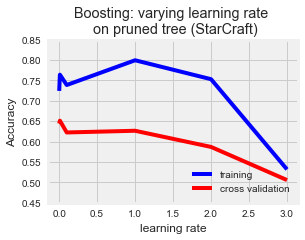

In [38]:
f = plt.figure()
plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='cross validation')

plt.legend(loc='lower right')
plt.ylim(0.45, 0.85)
plt.title("Boosting: varying learning rate \n on pruned tree (StarCraft)")
plt.xlabel('learning rate')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s07.pdf", bbox_inches='tight')



### grid search

In [39]:
param_grid = {"n_estimators": [50,100,200], #500 is worse than 200
              "learning_rate": [0.001,0.01,.1]
              }
tree_final_model = DecisionTreeClassifier(max_depth=5, min_samples_split=40)
tree_boost_gs = GridSearchCV(AdaBoostClassifier(tree_final_model),
                       param_grid=param_grid, cv=10)

tree_boost_gs.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200], 'learning_rate': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [40]:
tree_boost_gs.best_params_

{'learning_rate': 0.001, 'n_estimators': 200}

In [41]:
boost_final_model = tree_boost_gs.best_estimator_
test_Y_predict = boost_final_model.fit(train_X, train_Y).predict(test_X)
accuracy_score(test_Y, test_Y_predict)

0.67514970059880242

### boosting: result for best model

In [42]:
boost_temp_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, min_samples_split=40),
                                     n_estimators=200, learning_rate=0.001)
clf = boost_temp_model.fit(train_X, train_Y)

start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
#print 'train acc: ', train_acc
#print 'test acc: ', test_acc
#print 'train time: ', train_time
#print 'test time: ', test_time

### boosting: time vs iterations 

In [43]:
time=[]
iteration=[]
for i in range(1,200,5):
    start = timeit.default_timer()
    clf = AdaBoostClassifier(tree_final_model, n_estimators=i)
    clf = clf.fit(train_X, train_Y)
    stop = timeit.default_timer()
    time.append(stop - start)
    iteration.append(i)

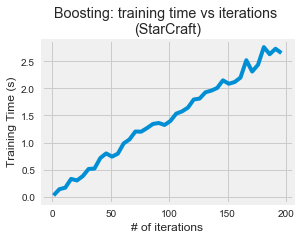

In [45]:
f = plt.figure()
plt.plot(iteration, time)
plt.legend(loc='lower right')
#plt.ylim(0.7, 1.02)
plt.title("Boosting: training time vs iterations \n(StarCraft)")
plt.xlabel('# of iterations')
plt.ylabel('Training Time (s)');
#plt.xticks(np.arange(0,2.1,0.5))
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s08.pdf", bbox_inches='tight')



## knn

hyperparameters:

k

weight/unweight

### A simple run

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=14, weights='uniform', p=1)
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
#print "Train acc:", train_acc
#print "Test acc:", test_acc

### knn - change k unweighted

In [47]:
degree1 = np.arange(1,101,5)
degree2 = np.arange(101,301,50)
degree = np.concatenate([degree1,degree2])
train_scores, val_scores = validation_curve(KNeighborsClassifier(), train_X, train_Y,
                                          'n_neighbors', degree, cv=3)

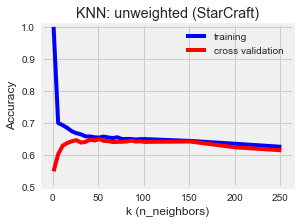

In [48]:
f = plt.figure()
plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='cross validation')
plt.legend(loc='upper right')
plt.ylim(0.5, 1.01)
plt.title("KNN: unweighted (StarCraft)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s09.pdf", bbox_inches='tight')



### knn - change k weighted by distance

In [49]:

train_scores_w, val_scores_w = validation_curve(KNeighborsClassifier(weights = 'distance'), train_X, train_Y,
                                          'n_neighbors', degree, cv=10)

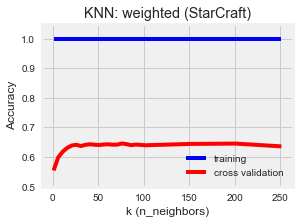

In [50]:
f = plt.figure()
plt.plot(degree, np.mean(train_scores_w, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores_w, 1), color='red', label='cross validation')
plt.legend(loc='lower right')
plt.ylim(0.5, 1.05)
plt.title("KNN: weighted (StarCraft)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s10.pdf", bbox_inches='tight')



### knn - unweighted vs weighted

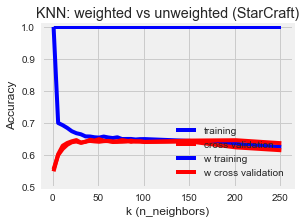

In [51]:
f = plt.figure()
plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='cross validation')
plt.plot(degree, np.mean(train_scores_w, 1), color='blue', label='w training')
plt.plot(degree, np.mean(val_scores_w, 1), color='red', label='w cross validation')
plt.legend(loc='lower right')
plt.ylim(0.5, 1.01)
plt.title("KNN: weighted vs unweighted (StarCraft)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s11.pdf", bbox_inches='tight')



### knn grid search

In [52]:
param_grid = {"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,25,30,40,45,50],
              "p": [1, 2],
              "weights": ['uniform', 'distance']
              }

knn_gs = GridSearchCV(KNeighborsClassifier(),
                       param_grid=param_grid, cv=10)

knn_gs.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 40, 45, 50], 'p': [1, 2], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [53]:
knn_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=1,
           weights='distance')

In [54]:
knn_final_model = knn_gs.best_estimator_
test_Y_predict = knn_final_model.fit(train_X, train_Y).predict(test_X)
accuracy_score(test_Y, test_Y_predict)

0.6586826347305389

### knn - learning curve on best model

In [55]:
range1 = np.arange(25,500,25)
range2 = np.arange(500,2301,200)
range_combine = np.concatenate([range1,range2])
training_size, train_lc, val_lc = learning_curve(knn_final_model,
                                         train_X, train_Y, cv=10,
                                         train_sizes=range_combine)

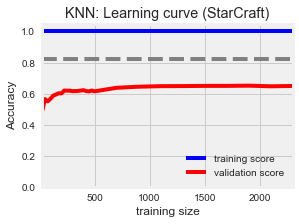

In [56]:
f = plt.figure()
plt.plot(training_size, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(training_size, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), training_size[0], training_size[-1],
                 color='gray', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylim(0., 1.05)
plt.xlim(training_size[0], training_size[-1])
plt.title("KNN: Learning curve (StarCraft)")
plt.xlabel('training size')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s12.pdf", bbox_inches='tight')



### knn: time vs iterations


In [58]:
train_time=[]
test_time=[]
iteration=[]
for i in range(1,201,5):
    start = timeit.default_timer()
    clf = KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf = clf.fit(train_X, train_Y)
    stop = timeit.default_timer()
    train_time.append(stop - start)
    start = timeit.default_timer()
    test_Y_predict = clf.predict(test_X)
    stop = timeit.default_timer()
    test_time.append(stop - start)
    iteration.append(i)

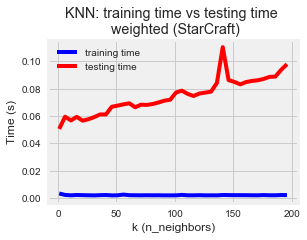

In [59]:
f = plt.figure()

plt.plot(iteration, train_time, color='blue', label='training time')
plt.plot(iteration, test_time, color='red', label='testing time')
plt.legend(loc='upper left')
#plt.ylim(0.7, 1.02)
plt.title("KNN: training time vs testing time \n weighted (StarCraft)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Time (s)');
#plt.xticks(np.arange(0,2.1,0.5))
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s13.pdf", bbox_inches='tight')



### knn: result for best model

In [60]:
knn_temp_model = KNeighborsClassifier(n_neighbors=25, p=1, weights='distance')
clf = knn_temp_model.fit(train_X, train_Y)

start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
#print 'train acc: ', train_acc
#print 'test acc: ', test_acc
#print 'train time: ', train_time
#print 'test time: ', test_time

## svm

hyperparameters:

Linear Kernel: No parameters

Polynomial: degree (and C)

RBF: gamma and C

### a simple run

In [61]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
#print "Train acc:", train_acc
#print "Test acc:", test_acc

In [62]:
clf = svm.SVC(kernel='rbf')
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
#print "Train acc:", train_acc
#print "Test acc:", test_acc

In [63]:
clf = svm.SVC(kernel='poly')
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
#print "Train acc:", train_acc
#print "Test acc:", test_acc

### svm - poly kernel, degree vs C

In [64]:
degree = range(1,11)
#degree = [1,2,3,4,5,7,10]
train_scores_svm1, val_scores_svm1 = validation_curve(svm.SVC(kernel='poly', C=0.01), train_X, train_Y,
                                          'degree', degree, cv=10)
train_scores_svm2, val_scores_svm2 = validation_curve(svm.SVC(kernel='poly', C=0.1), train_X, train_Y,
                                          'degree', degree, cv=10)
train_scores_svm3, val_scores_svm3 = validation_curve(svm.SVC(kernel='poly', C=1), train_X, train_Y,
                                          'degree', degree, cv=10)
train_scores_svm4, val_scores_svm4 = validation_curve(svm.SVC(kernel='poly', C=10), train_X, train_Y,
                                          'degree', degree, cv=10)

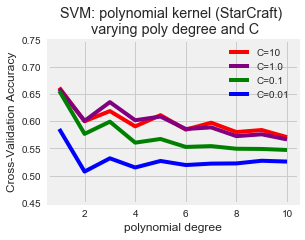

In [65]:
f = plt.figure()

plt.plot(degree, np.mean(val_scores_svm4, 1), color='red', label='C=10')
plt.plot(degree, np.mean(val_scores_svm3, 1), color='purple', label='C=1.0')
plt.plot(degree, np.mean(val_scores_svm2, 1), color='green', label='C=0.1')
plt.plot(degree, np.mean(val_scores_svm1, 1), color='blue', label='C=0.01')

plt.legend(loc='upper right')
plt.ylim(0.45, 0.75)
plt.title("SVM: polynomial kernel (StarCraft) \n varying poly degree and C")
plt.xlabel('polynomial degree')
plt.ylabel('Cross-Validation Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s14.pdf", bbox_inches='tight')



### svm - rbf, change C

In [66]:
#degree = [0.03,0.1,0.3,1.0,3.0,10.0,30.0,100.0]
degree = np.logspace(-1.5, 3, 10)
train_scores, val_scores = validation_curve(svm.SVC(kernel='rbf'), train_X, train_Y,
                                          'C', degree, cv=10)

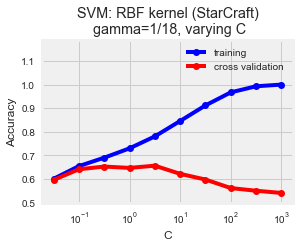

In [67]:
f = plt.figure()
plt.plot(degree, np.median(train_scores, 1), 'o-',color='blue', label='training')
plt.plot(degree, np.median(val_scores, 1), 'o-', color='red', label='cross validation')

plt.legend(loc='upper right')
plt.ylim(0.5, 1.19)
plt.title("SVM: RBF kernel (StarCraft)\n gamma=1/18, varying C")
plt.xlabel('C')
plt.ylabel('Accuracy');
plt.xscale('log')
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s15.pdf", bbox_inches='tight')



### svm - rbf change gamma

In [68]:
#degree = [0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3]
degree = np.logspace(-4, 1, 11)

train_scores, val_scores = validation_curve(svm.SVC(kernel='rbf'), train_X, train_Y,
                                          'gamma', degree, cv=10)### svm - rbf change gamma


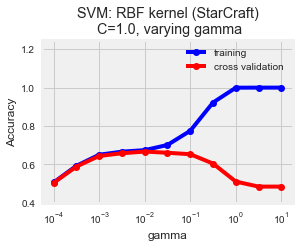

In [69]:
f = plt.figure()
plt.plot(degree, np.median(train_scores, 1), 'o-',color='blue', label='training')
plt.plot(degree, np.median(val_scores, 1), 'o-', color='red', label='cross validation')

plt.legend(loc='upper right')
plt.ylim(0.4, 1.25)
plt.title("SVM: RBF kernel (StarCraft)\n C=1.0, varying gamma")
plt.xlabel('gamma')
plt.ylabel('Accuracy');
plt.xscale('log')
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s16.pdf", bbox_inches='tight')



### SVM: result for best parameters

In [70]:
clf = svm.SVC(kernel='rbf', C=10, gamma=0.01)
#clf = grid.best_estimator_
start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
#print 'train acc: ', train_acc
#print 'test acc: ', test_acc
#print 'train time: ', train_time
#print 'test time: ', test_time

### svm - learning curve

In [71]:
# use linear kernel
training_size, train_lc, val_lc = learning_curve(svm.SVC(kernel='linear'),
                                         train_X, train_Y, cv=10,
                                         train_sizes=np.linspace(0.01, 1, 50), n_jobs=1)

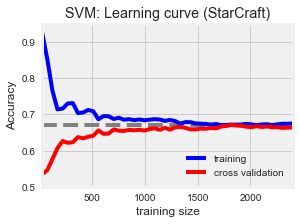

In [72]:
f = plt.figure()
plt.plot(training_size, np.mean(train_lc, 1), color='blue', label='training')
plt.plot(training_size, np.mean(val_lc, 1), color='red', label='cross validation')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), training_size[0], training_size[-1],
                 color='gray', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylim(0.5, 0.95)
plt.xlim(training_size[0], training_size[-1])
plt.title("SVM: Learning curve (StarCraft)")
plt.xlabel('training size')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s17.pdf", bbox_inches='tight')



## neural network

hyperparameters: the number of hidden nodes/layers, momentum and learning rates in a Neural Network are hyperparameters

### ann: various L and M (or weight decay) w/ various #epoch (x axis)

### ann: training vs cv at L=0.3, M=0.2, various #epoch

In [73]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
#print "Train acc:", train_acc
#print "Test acc:", test_acc

### MLP: # layers & # nodes

In [74]:
degree = [(10,),(20,),(50,),(20,20),(20,20,20)]

mlps=[]
train_times=[]
test_times=[]
train_accs=[]
test_accs=[]

for i in range(len(degree)):
    # train
    mlp = MLPClassifier(max_iter=10000, early_stopping=True,hidden_layer_sizes=degree[i])
    start = timeit.default_timer()
    mlp.fit(train_X, train_Y)
    stop = timeit.default_timer()
    train_time = stop - start
    # train result
    train_Y_predict = clf.predict(train_X)
    train_acc = accuracy_score(train_Y, train_Y_predict)
    # test
    start = timeit.default_timer()
    test_Y_predict = clf.predict(test_X)
    stop = timeit.default_timer()
    test_time = stop - start
    test_acc = accuracy_score(test_Y, test_Y_predict)
    # save results
    mlps.append(mlp)
    train_times.append(train_time)
    test_times.append(test_time)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

#print "degree|train acc|test acc|train time|test time"
#for i in range(len(degree)):
#    print degree[i], train_accs[i],test_accs[i],train_times[i],test_times[i]

### MLP: change L and M

In [75]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0.5,
           'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0.5,
           'learning_rate_init': 0.01},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0.5,
           'learning_rate_init': 0.1},
         ]

mlps=[]

for param in params:
    mlp = MLPClassifier(hidden_layer_sizes=(15,),verbose=0, max_iter=10000, **param)
    mlp.fit(train_X, train_Y)
    mlps.append(mlp)

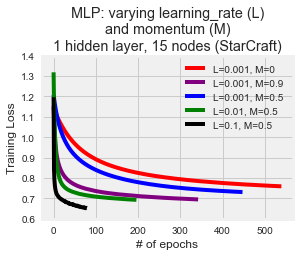

In [76]:
labels = ["L=0.001, M=0", 
          "L=0.001, M=0.9", 
          "L=0.001, M=0.5", 
          "L=0.01, M=0.5", 
          "L=0.1, M=0.5", 
         ]

plot_args = [{'c': 'red'},
             {'c': 'purple'},
             {'c': 'blue'},
             {'c': 'green'},
             {'c': 'black'}]   
f = plt.figure()
for mlp, label, args in zip(mlps, labels, plot_args):
    plt.plot(mlp.loss_curve_, label=label, **args)

plt.legend(loc='upper right')
plt.ylim(0.6, 1.4)
plt.title("MLP: varying learning_rate (L)\nand momentum (M)\n1 hidden layer, 15 nodes (StarCraft)")
plt.xlabel('# of epochs')
plt.ylabel('Training Loss');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/s18.pdf", bbox_inches='tight')



### grid search for L and M

In [77]:
param_grid = {"momentum": np.arange(0.1,1,0.1),
              "learning_rate_init": [.001, .01, 0.1, 1.],
              }

ann_gs = GridSearchCV(MLPClassifier(hidden_layer_sizes=(15,),solver='sgd',max_iter=10000,early_stopping=True, 
                                   random_state=88),
                       param_grid=param_grid,cv=10)

ann_gs.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=88, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'momentum': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]), 'learning_rate_init': [0.001, 0.01, 0.1, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [78]:
ann_gs.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10000,
       momentum=0.80000000000000004, nesterovs_momentum=True, power_t=0.5,
       random_state=88, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [79]:
mlp_final_model = ann_gs.best_estimator_
test_Y_predict = mlp_final_model.fit(train_X, train_Y).predict(test_X)
accuracy_score(test_Y, test_Y_predict)

0.62425149700598803

In [80]:
mlp_temp_model = MLPClassifier(hidden_layer_sizes=(15,),solver='sgd',learning_rate_init=0.1, 
                               momentum=0.8, max_iter=10000,early_stopping=True)
clf = mlp_temp_model.fit(train_X, train_Y)

start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
#print 'train acc: ', train_acc
#print 'test acc: ', test_acc
#print 'train time: ', train_time
#print 'test time: ', test_time